In [1]:
# K-Nearest Neighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing # data scaling

In [2]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv





--2023-07-03 09:08:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  --.-KB/s    in 0.02s   

2023-07-03 09:08:32 (2.00 MB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



In [3]:
df = pd.read_csv("./teleCust1000t.csv")
df
# 각 칼럼 의미 찾아서 적어놓기
# region: county/village 단위의 인코딩
# tenure: 이 통신사와 연속 계약 개월 수
# age: 나이
# marital (status): 기혼(1) 여부
# address: street 단위의 인코딩
# income: 1,000 USD 소득
# ed: 1~5 (초등~대학원)
# employ: 근속 연수
# retire: 은퇴(1) 여부
# gender: 남성(1) 여성(0)
# reside: 주거형태 분류 1~8
# custcat: 고객 분류 basic, E, plus, total

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [4]:
df.reside.value_counts()

1    375
2    272
3    138
4    120
5     60
6     29
7      4
8      2
Name: reside, dtype: int64

In [5]:
X = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]].values
y = df["custcat"].values
# X랑 y는 이제 numpy 배열

In [6]:
# scaler = StandardScaler()
# scaler.fit()....

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# standard scaler 클래스 메서드로 둘을 연달아 호출
# fit은 X를 보고 scaling하기 위한 수치들을 계산 -> 평균 분산
# transform은 그렇게 계산된 값으로 X를 조작 (즉 스케일링)
# 한 번에 하려면 fit_transform()을 호출해도 됨
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [7]:
# train_test_split으로 학습/검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state는 numpy, python, tensorflow 등에서는 random_seed라고도 불림
# train_test_split이 랜덤하게 데이터셋 분리를 함
# 만약 반복된 실험을 통해 일관된 결과를 얻고 싶다면 random_state (또는 seed)를 고정 후 반복하면 됨

X_train.shape

(800, 11)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가 지표

In [9]:
k = 4
knnc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat = knnc.predict(X_test)
# string formatting으로 정확도 프린트해보기
print("Train accuracy: {}".format(metrics.accuracy_score(y_train, knnc.predict(X_train))))
print("Test accuracy: {}".format(metrics.accuracy_score(y_test, yhat)))


# training accuracy란?
# 정의 자체는 (학습 데이터셋에서) 몇 문제 중 몇개 맞혔는지
# train accuracy 왜 100%가 아닌지
# 만약 train accuracy가 낮게 나왔다 (개인적 예상값? 다른 사람 (비슷해보이는) 코드?)
# 데이터: -> 양질의 데이터 추가 확보; 기존 데이터 cleaning/cleansing wrangling -> outlier 솎아내기; scaling 더 잘해본다거나
# batch 단위로 normalization; 데이터 튜닝
# 모델: 파라미터를 조정 (KNN 같으면 K 조정; SVM 같으면 C나 Kernel 조정; 신경망 같으면, 층 수, 폭, learning_rate, batch_size, ...)
# 모델: 모델 자체를 다른 걸 써보겠다 -> (설명 가능성을 어느 정도 희생시키고) 좀 더 복잡한 (표현력이 높은 representational complexity) 모델로
# 모델: 모델 여럿에게 물어봐야겠다 -> 앙상블 모델


Train accuracy: 0.54375
Test accuracy: 0.325


In [10]:
# 66번 슬라이드 K를 적절하게 정하는 방법
# K = 5~15
# K = sqrt(n)
# n=1000 ~31, 32
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [11]:
k = 32
knnc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat = knnc.predict(X_test)
# string formatting으로 정확도 프린트해보기
print("Train accuracy: {}".format(metrics.accuracy_score(y_train, knnc.predict(X_train))))
print("Test accuracy: {}".format(metrics.accuracy_score(y_test, yhat)))

Train accuracy: 0.44
Test accuracy: 0.34


In [12]:
knnc_list = []
for k in range(1, 32):
  knnc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  yhat = knnc.predict(X_test)
  # string formatting으로 정확도 프린트해보기
  # print("Train accuracy: {}".format(metrics.accuracy_score(y_train, knnc.predict(X_train))))
  test_acc = metrics.accuracy_score(y_test, yhat)
  print("KNNC candidate #{} performs at Test accuracy: {}".format(k-1, test_acc))
  knnc_list.append((knnc, test_acc))

KNNC candidate #0 performs at Test accuracy: 0.29
KNNC candidate #1 performs at Test accuracy: 0.34
KNNC candidate #2 performs at Test accuracy: 0.365
KNNC candidate #3 performs at Test accuracy: 0.325
KNNC candidate #4 performs at Test accuracy: 0.33
KNNC candidate #5 performs at Test accuracy: 0.33
KNNC candidate #6 performs at Test accuracy: 0.33
KNNC candidate #7 performs at Test accuracy: 0.335
KNNC candidate #8 performs at Test accuracy: 0.33
KNNC candidate #9 performs at Test accuracy: 0.35
KNNC candidate #10 performs at Test accuracy: 0.355
KNNC candidate #11 performs at Test accuracy: 0.345
KNNC candidate #12 performs at Test accuracy: 0.345
KNNC candidate #13 performs at Test accuracy: 0.375
KNNC candidate #14 performs at Test accuracy: 0.36
KNNC candidate #15 performs at Test accuracy: 0.355
KNNC candidate #16 performs at Test accuracy: 0.35
KNNC candidate #17 performs at Test accuracy: 0.39
KNNC candidate #18 performs at Test accuracy: 0.37
KNNC candidate #19 performs at Te

In [13]:
# [과제] K-fold cross validation으로 최적의 K (KNN의 K)찾기
# 이 과제 이전에는 우리가 직접 train set, test set을 정해줌 8:2로 해놓고 2에 해당되는 부분은 test set
# 2에 해당되는 부분 (test set 역할)을 돌아가면서 검증 정확도를 측정하고,
# 그 검증 정확도 값들을 평균 내자

from sklearn.model_selection import KFold
kf = KFold(n_splits=5) # 인스턴스 만들기 K-fold의 k 값 정해주기
for k in range(1, 32): # KNN k 값 1~31까지 보겠다
  fold_acc = list()    # K-fold 돌아가면서 측정된 test acc 저장할 곳
  for train_idx, test_idx in kf.split(X): # K-Fold 교차 검증
    # split 메서드는 train set, test set에 해당하는 인덱스들의 배열을 반환
    # 이 배열의 길이는 n_splits
    # 배열의 한 원소는 튜플
    # 튜플의 원소 둘은 각각 train_index들, test_index들
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knnc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = knnc.predict(X_test)
    # string formatting으로 정확도 프린트해보기
    # print("Train accuracy: {}".format(metrics.accuracy_score(y_train, knnc.predict(X_train))))
    test_acc = metrics.accuracy_score(y_test, yhat)
    fold_acc.append(test_acc)
  print("KNNC n_neighbors={} performs at average Test accuracy: {}".format(k, np.asarray(fold_acc).mean()))

# k-fold 교차검증을 하니까, 안 했을 때 대비
# i) best model이 달라짐
# ii) best acc이 낮아짐
# 이 둘로부터 알 수 있는 사실:
# k-fold CV 안 했을 때, train_set, test_set split이 운이 좋았다
# 그래서 k-fold CV는 운이 작용할 여지를 줄여줌
# 또한 cherry-picking을 방지

KNNC n_neighbors=1 performs at average Test accuracy: 0.274
KNNC n_neighbors=2 performs at average Test accuracy: 0.297
KNNC n_neighbors=3 performs at average Test accuracy: 0.32199999999999995
KNNC n_neighbors=4 performs at average Test accuracy: 0.31599999999999995
KNNC n_neighbors=5 performs at average Test accuracy: 0.325
KNNC n_neighbors=6 performs at average Test accuracy: 0.30700000000000005
KNNC n_neighbors=7 performs at average Test accuracy: 0.32199999999999995
KNNC n_neighbors=8 performs at average Test accuracy: 0.335
KNNC n_neighbors=9 performs at average Test accuracy: 0.34199999999999997
KNNC n_neighbors=10 performs at average Test accuracy: 0.32
KNNC n_neighbors=11 performs at average Test accuracy: 0.324
KNNC n_neighbors=12 performs at average Test accuracy: 0.32399999999999995
KNNC n_neighbors=13 performs at average Test accuracy: 0.317
KNNC n_neighbors=14 performs at average Test accuracy: 0.31300000000000006
KNNC n_neighbors=15 performs at average Test accuracy: 0.3

#Case K=1 performs at cross validation accuracy: 0.27
#Case K=2 performs at cross validation accuracy: 0.285
#Case K=3 performs at cross validation accuracy: 0.308
#Case K=4 performs at cross validation accuracy: 0.312
#Case K=5 performs at cross validation accuracy: 0.324
#Case K=6 performs at cross validation accuracy: 0.308
#Case K=7 performs at cross validation accuracy: 0.32
#Case K=8 performs at cross validation accuracy: 0.323
#Case K=9 performs at cross validation accuracy: 0.323
#Case K=10 performs at cross validation accuracy: 0.32
#Case K=11 performs at cross validation accuracy: 0.329
#Case K=12 performs at cross validation accuracy: 0.33
#Case K=13 performs at cross validation accuracy: 0.328
#Case K=14 performs at cross validation accuracy: 0.327
#Case K=15 performs at cross validation accuracy: 0.334
#Case K=16 performs at cross validation accuracy: 0.336
#Case K=17 performs at cross validation accuracy: 0.335
#Case K=18 performs at cross validation accuracy: 0.342
#Case

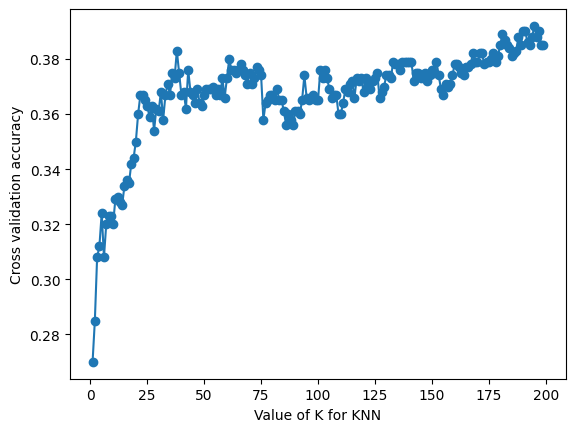

In [14]:
### 제보 받은 K-Fold 구현
from sklearn.model_selection import cross_val_score

k_range = range(1, 200)
k_scores = list()

for k in k_range:
  knnc = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knnc, X, y, cv=5, scoring="accuracy")
  k_scores.append(scores.mean())
  print("#Case K={} performs at cross validation accuracy: {}".format(k, round(scores.mean(), 4)))

_, ax = plt.subplots()
ax.plot(k_range, k_scores, marker='o')
ax.set_xlabel("Value of K for KNN")
ax.set_ylabel("Cross validation accuracy")
plt.show()

In [15]:
# 로지스틱 회귀 (Logistic regression; Logit regression)
# 분류 카테고리/클래스 별로 속할 확률을 출력함
import scipy.optimize as opt


In [16]:
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv





--2023-07-03 09:08:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.03s   

2023-07-03 09:08:54 (1014 KB/s) - ‘ChurnData.csv’ saved [35943/35943]



In [17]:
# 통신사 데이터
# churn -> 번호이동 (통신사 옮기는)
df = pd.read_csv("./ChurnData.csv")
df
# churn 동사 꿈틀 -> 통신사 갈아탄다
# 다년간 고객 추적 데이터를 통해서 이후 180일 안에 고객이 통신사를 바꿨는지가 0 또는 1로 기록됨
# 각 칼럼 의미 찾아서 다 적어두기
# https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
# 모든 칼럼의 의미가 기술되어있습니다

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [18]:
df.churn.value_counts()
# data imbalance
# class 불균형이 있습니다 그러므로 학습 성능 지표를 잘 선정해야 하고,
# 학습이 잘 될지 (별도의 특별한 조치 없이 (스마트한 모종의 sampling이라든지))

0.0    142
1.0     58
Name: churn, dtype: int64

In [19]:
# 머신러닝 파이프라인

# 데이터 다운로드 (wget, 공공데이터포털, kaggle, paperswithcode, dacon, UCI ML repository, ...)

# 데이터 열기 (tpmon.txt, hp1.txt, ddd.data --> python I/O with open(filename, "r")...)
# (.csv, .tsv --> pandas.read_csv(sep="\t"))
# (.xls, .xlsx --> pandas.read_excel()  openpyxl 패키지 설치해야 할 수도)
# (.npy, .npz --> numpy.load)

# 데이터프레임 구성 (pandas.DataFrame(...))
# pandas.concatenate

# (선택적) 관련 통계치 파악 데이터 기본적 특성 (describe())

# 독립변수, 종속변수 선정 후 numpy 배열로 변환
X = np.asarray(df[["tenure", "income", "wireless", "internet"]])
y = np.asarray(df["churn"])

# 선정 후 scaling (StandardScaler())
X = preprocessing.StandardScaler().fit_transform(X)

# 학습 데이터, 검증 데이터 분리 (train_test_split())
# 이후에 cross_val_score에서 몰아서 하도록 구현해도 됨
# pseudocode

# 모델 인스턴스 만들기 (regr = LinearRegression(); knnc = KNeighborsClassifier(); ...)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# fit()
scores = cross_val_score(LR, X, y, cv=5, scoring="accuracy") # 알아서 K-Fold 교차 검증까지

# 성능 지표 측정
print(scores.mean())

0.76


In [20]:
kf = KFold(n_splits=5)
for train_idx, test_idx in kf.split(X): # K-Fold 교차 검증
  # split 메서드는 train set, test set에 해당하는 인덱스들의 배열을 반환
  # 이 배열의 길이는 n_splits
  # 배열의 한 원소는 튜플
  # 튜플의 원소 둘은 각각 train_index들, test_index들
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  LR = LogisticRegression()
  LR.fit(X_train, y_train)
  yhat = LR.predict(X_test)

  # knnc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  # yhat = knnc.predict(X_test)
  # string formatting으로 정확도 프린트해보기
  # print("Train accuracy: {}".format(metrics.accuracy_score(y_train, knnc.predict(X_train))))
  print(y_test)
  print(yhat)
  print()
  test_acc = metrics.accuracy_score(y_test, yhat)
  fold_acc.append(test_acc)
print("LR performs at average Test accuracy: {}".format(np.asarray(fold_acc).mean()))

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]

[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

[0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]

[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[1. 0. 0. 1.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, yhat))
# precision 0.0 --> 0.0으로 예측했을 때 중에서 실제로 0.0인 경우
# precision 1.0 --> 1.0으로 예측했을 때 중에서 실제로 1.0인 경우
# recall 0.0 --> 실제로 0.0인 경우 중에서 0.0으로 예측된 경우
# recall 1.0 --> 실제로 1.0인 경우 중에서 1.0으로 예측된 경우
# data imbalance (1의 갯수 << 0의 갯수) 가 드러남
# 불균형을 위한 조치를 취하는 방법들: 과정 후반부에 다시 보기 (revisiting the data imbalance problem)
# f1-score는 recall, precision의 조화 평균
# support는 실제(정답) 라벨 갯수

# accuracy, avg 값들 설명 추가해놓기
# accuracy: 분류 정확도 (몇 문제 중 몇 문제 맞혔는지)
# macro avg: 클래스마다 metric을 계산하고 클래스 갯수로 평균 (예) precision_0, precision_1 계산하고 0.5 평균
# weighted avg: 클래스마다 metric을 계산하고 샘플 갯수로 가중평균 (예) precision_0, precision_1 계산하고 0.75:0.25 가중 평균

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90        30
         1.0       0.75      0.60      0.67        10

    accuracy                           0.85        40
   macro avg       0.81      0.77      0.78        40
weighted avg       0.84      0.85      0.84        40



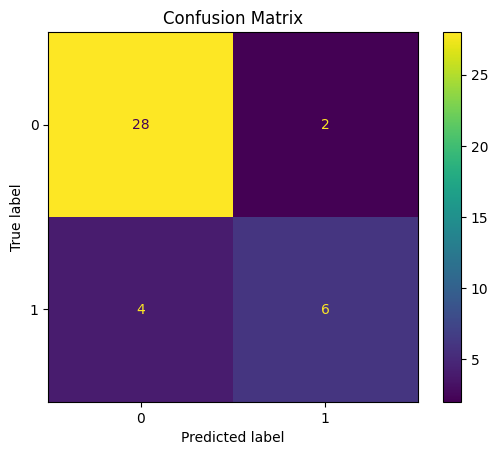

In [22]:
cm = confusion_matrix(y_test, yhat) # 혼동 행렬 만듦
# 만들어놓은 행렬을 그리기
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [23]:
df.churn.value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [24]:
### 데이터셋이랑 나중에 해볼거
# Netflix Revenue --> Decision Tree Regressor
# CIA Country Facts --> Clustering
# Amex default prediction --> deep learning 넘어가서 (대량 데이터)

In [25]:
# 과제 -> 분류 데이터셋 링크 (또는 직접 기수집한 세트 있으면?) 가져와주세요
# 데이터셋의 모든 값이 int 또는 float이어야 해요
# toy example

# bankruptcy classification

In [26]:
from sklearn import svm

In [27]:
df = pd.read_csv("data.csv")
df
# 저는 시각화를 위해 독립변수 2개만 고르겠습니다
# Bankrupt? (0번 칼럼이 종속변수)

FileNotFoundError: ignored

In [ ]:
df.columns.str.contains("")

In [ ]:
X = np.asanyarray(df[[" Total debt/Total net worth", " Debt ratio %"]].values) # 독립변수 2개
y = np.asanyarray(df[["Bankrupt?"]].values).ravel()
print(X.shape, y.shape)

In [ ]:
X = preprocessing.StandardScaler().fit_transform(X)
X

In [ ]:
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor="k")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_test.shape)

In [ ]:
svc = svm.SVC() # 인자로 C와 kernel을 받을 수 있음
svc.fit(X_train, y_train) # 그림 하나 그려짐
# sklearn에서 제공하는 pipeline 기능의 일종
# pipeline라는 이름의 클래스가 있는데,
# 거기에 우리가 수행하고자 하는 일련을 작업들을
# 순서대로 넣으면 순차적으로 수행함

In [ ]:
yhat = svc.predict(X_test)
test_acc = metrics.accuracy_score(y_test, yhat)
print(test_acc)

In [ ]:
# k-fold 교차검증
scores = cross_val_score(svc, X, y, cv=5, scoring="accuracy")
print(scores.mean())

In [ ]:
print(classification_report(y_test, yhat))

In [ ]:
df["Bankrupt?"].value_counts()

In [ ]:
print(yhat.sum())

In [ ]:
cm = confusion_matrix(y_test, yhat) # 혼동 행렬 만듦
# 만들어놓은 행렬을 그리기
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 0과 1 비율을 어느 정도 맞춰서 데이터셋을 구성해보자
# 지금 6599:220
df0 = df.loc[df["Bankrupt?"]==0]
df0 = df0.iloc[np.random.randint(low=0, high=6599, size=220)]
df1 = df.loc[df["Bankrupt?"] ==1]
df = pd.concat([df0, df1])
df

In [ ]:
X = np.asanyarray(df[[" Total debt/Total net worth", " Debt ratio %"]].values) # 독립변수 2개
y = np.asanyarray(df[["Bankrupt?"]].values).ravel()
print(X.shape, y.shape)

In [ ]:
X = preprocessing.StandardScaler().fit_transform(X)
X

In [ ]:
# k-fold 교차검증
scores = cross_val_score(svc, X, y, cv=5, scoring="accuracy")
print(scores.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_test.shape)

In [ ]:
svc = svm.SVC() # 인자로 C와 kernel을 받을 수 있음
# C 기본값이 1.0, kernel 기본값은 "rbf"
svc.fit(X_train, y_train) # 그림 하나 그려짐
# sklearn에서 제공하는 pipeline 기능의 일종
# pipeline라는 이름의 클래스가 있는데,
# 거기에 우리가 수행하고자 하는 일련을 작업들을
# 순서대로 넣으면 순차적으로 수행함

In [ ]:
yhat = svc.predict(X_test)
test_acc = metrics.accuracy_score(y_test, yhat)
print(test_acc)

In [ ]:
print(classification_report(y_test, yhat))

In [ ]:
plt.figure()
_, ax = plt.subplots()
ax.scatter(X_test[:, 0], X_test[:, 1], edgecolor="k")
plt.show()